# Домашнее задание 2

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import RidgeCV, SGDRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error,median_absolute_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
RANDOM_SEED = 0

**Срок сдачи:** 25 октября 2016, 23:59 <br\>

При отправлении ДЗ на почту указывайте **фамилию** в названии файла, и тему письма оформляйте в следующем формате: <br\>
** [Maйнор 2016] ДЗ2 **<br\>

Прочтите статью ["USING	DATA	MINING	TO	PREDICT	SECONDARY SCHOOL	STUDENT	ALCOHOL	CONSUMPTION"](https://www.dropbox.com/s/054unjn4bfo0khj/STUDENT%20ALCOHOL%20CONSUMPTION.pdf?dl=0), загрузите [датасет](https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION#) и выполните следующие задания:

In [8]:
#делаем один датасет из двух
#некоторые студенты встречаются два раза, но в свете разных предметов
studm = pd.read_csv('student-mat.csv',sep=';')
studp = pd.read_csv('student-por.csv',sep=';')

#сделаем признак предмета, чтобы не утратить информацию о двух разных таблицах
studm['Subject'] = 1
studp['Subject'] = 0

#делаем одну таблицу с общим индексом
studdf = pd.concat([studm,studp],ignore_index=True)
studdf = studdf.sample(frac=1).reset_index(drop=True)
studdf.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject
0,MS,M,18,R,GT3,T,1,0,at_home,at_home,...,3,2,1,1,4,0,12,12,13,0
1,GP,M,17,R,GT3,T,2,2,other,other,...,5,2,1,1,1,0,12,13,13,0
2,GP,F,15,U,GT3,T,3,2,services,other,...,3,5,1,1,2,26,7,6,6,1
3,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,12,12,13,0
4,GP,M,15,U,LE3,T,1,2,other,at_home,...,3,2,1,1,5,0,14,13,14,0


# Работа с данными (4 балла)
- Приведите описание признаков датасета на русском языке с указанием типа данных (1 балла)
- Предобработка данных (3)
    - Проверьте наличие пропусков. В случае наличия пропусков заполните их медианными значениями (1)
    - Подсчитайте количество записей, у которых признак Medu имеет значение "4" (1)
    - Преобразуйте все номинальные признаки в несколько признаков с бинарным значение (1)

#### Приведите описание признаков датасета на русском языке с указанием типа данных
- 1 school - школа учащегося (бинарный: 'GP' - Gabriel Pereira или 'MS' - Mousinho da Silveira) 
- 2 sex - пол учащегося (бинарный: 'F' - женский или 'M' - мужской) 
- 3 age - возраст учащегося (вещественный: от 15 до 22) 
- 4 address - тип домашнего адреса учащегося (бинарный: 'U' - городской или 'R' - загородный) 
- 5 famsize - размер семьи (бинарный: 'LE3' - меньше или равный 3 или 'GT3' - больше чем 3) 
- 6 Pstatus - статус сожительства родителей (бинарный: 'T' - живут вместе или 'A' - раздельно) 
- 7 Medu - образование матери (вещественный: 0 - нет, 1 - начальное образование (4ый класс), 2 - от 5го до 9го класса, 3 - среднее образование или 4 - высшее образование) 
- 8 Fedu - образование отца (вещественный: 0 - нет, 1 - начальное образование (4ый класс), 2 - от 5го до 9го класса, 3 - среднее образование или 4 - высшее образование) 
- 9 Mjob - работа матери (категориальный: учитель - 'teacher', относится к здравоохранению - 'health', государственная служба (e.g. чиновник или в полиции) - 'services', домохозяйка - 'at_home' или другое - 'other') 
- 10 Fjob - работа отца (категориальный: учитель - 'teacher', относится к здравоохранению - 'health', государственная служба (e.g. чиновник или в полиции) - 'services', домохозяйка - 'at_home' или другое - 'other') 
- 11 reason - причина выбора школы (категориальный: близко к дому - 'home', репутация школы - 'reputation', предпочтение предметов - 'course' или другое - 'other') 
- 12 guardian - опекун учащегося (категориальный: мать - 'mother', отец - 'father' или другое - 'other') 
- 13 traveltime - время дороги от дома до школы (вещественный: 1 - <15 мин., 2 - от 15 до 30 мин., 3 - от 30 мин. до 1 часа, или 4 - >1 часа) 
- 14 studytime - количество времени на учебу в неделю (вещественный: 1 - <2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, или 4 - >10 часов) 
- 15 failures - количество незачетов в прошлом (вещественный: n, если 1<=n<3, в ином случае 4) 
- 16 schoolsup - дополнительная образовательная поддержка в школе (бинарный: yes или no) 
- 17 famsup - дополнительная образовательная поддержка в семье (бинарный: yes или no)  
- 18 paid - дополнительные платные уроки по предмету (математика или португальский) (бинарный: yes или no)  
- 19 activities - внеклассные занятия (бинарный: yes или no) 
- 20 nursery - посещал ли детский сад (бинарный: yes или no)  
- 21 higher - хочет ли получить высшее образование (бинарный: yes или no) 
- 22 internet - доступ к интернету дома (бинарный: yes или no)  
- 23 romantic - есть ли романтические отношения (бинарный: yes или no)  
- 24 famrel - качество отношений в семье (вещественный: от 1 - очень плохие до 5 - отличные) 
- 25 freetime - свободное время после школы (вещественный: от 1 - очень мало до 5 - очень много) 
- 26 goout - сколько времени проводит с друзьями (вещественный: от 1 - очень мало до 5 - очень много)  
- 27 Dalc - потребление алкоголя в будни (вещественный: от 1 - очень мало до 5 - очень много) 
- 28 Walc - потребление алкоголя на выходных (вещественный: от 1 - очень мало до 5 - очень много)  
- 29 health - состояние здоровья (вещественный: от 1 - очень плохое до 5 - очень хорошее) 
- 30 absences - количество пропусков занятий (вещественный: от 0 до 93) 
<br><br>
оценки, относящиеся к предмету - математике или португальскому: 
- 31 G1 - оценка за первую четверть (вещественный: от 0 до 20) 
- 32 G2 - оценка за вторую четверть (вещественный: от 0 до 20) 
- 33 G3 - итоговая оценка (вещественный: от 0 до 20, цель предсказания) 

#### Проверьте наличие пропусков. В случае наличия пропусков заполните их медианными значениями

In [9]:
nas = np.sum(np.sum(pd.isnull(studdf)))
print(nas)
#сумма, отличная от нуля, указывает на наличие пропусков (isnull дает True == 1 на пропуске)
#но тут сумма равна нулю, ура

0


#### Подсчитайте количество записей, у которых признак Medu имеет значение "4" 

In [10]:
len(studdf[studdf['Medu'] == 4])

306

#### Преобразуйте все номинальные признаки в несколько признаков с бинарным значением

In [5]:
stud = studdf.iloc[:,:]

# для LabelEncoder - бинарные значения, потому что они в виде строк, а лучше бы числа
toencode = [0,1] + [3,4,5] + list(range(15,23))
lenc = LabelEncoder()
for i in toencode:
    stud.iloc[:,i] = lenc.fit_transform(stud.iloc[:,i])

# OneHotEncoding для категориальных
for i in list(range(8,12)):
    colname = list(studdf)[i]
    oh = pd.get_dummies(studdf.iloc[:,i],prefix=colname)
    stud = stud.drop(colname, axis=1)
    stud = pd.concat([stud,oh],axis=1)

## Классификация (6 баллов)

### Предписания
- Используйте accuracy как основную меру качества
- Классы в задаче несбалансированные. Для корректной кросс-валидации используйте стратифицированный способ разбиения на фолды [Stratified K-fold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)

### Задание
1. Задайте RANDOM_SEED и случайным образом разделите выборку на обучающую и контрольную в пропорции 80/20. Этот же RANDOM_SEED используйте при кросс-валидации (0.5 балла)
2. Random Forest (2 балла)
    - В статье описано использование Random Forest для предсказания важности фактором вляющих на потребление алкоголя.
    - Повторите эксперимент с использованием [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) и найдите наилучшие параметры с помощью кросс-валидации. (1 балл)
    - Изобразите аналогичную таблицу важности признаков для наилучшей настройки метода (значения могут отличаться). (0.5 балла)
    - Укажите значение accuracy для пяти наилучших настроек метода на контрольной выборке. (0.5 балла)

3. GradientBoosting (2 балла)
    - Обучите [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)  и найдите для него наилучшие параметры с помощью кросс-валидации. (0.5 балла)
    - Изобразите таблицу важности признаков для наилучшей настройки метода. Отличается ли она от таблицы метода RandomForest. Почему? (1 балл)
    - Укажите значение accuracy для пяти наилучших настроек метода. (0.5 балла)

4. AdaBoost (1 балл)
    - Обучите [AdaBoostClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) и найдите для него наилучшие параметры с помощью кросс-валидации. (0.5 балла)
    - Укажите значение accuracy для наилучших настроек метода. (0.5 балла)

5. Какой из классификаторов оказался лучше? (0.5 балла)

In [12]:
# делаем бинарные ответы из изначальных данных - в соответствии со статьей
y = (studdf.Dalc*5 + studdf.Walc*2) / 7
y = y.apply(lambda x: 0 if x < 3 else 1)

# удаляем из признаков те, из которых мы сделали ответ
studnew = stud.drop(['Walc','Dalc'],axis=1)

#### Задайте RANDOM_SEED и случайным образом разделите выборку на обучающую и контрольную в пропорции 80/20. Этот же RANDOM_SEED используйте при кросс-валидации

In [19]:
X_train, X_test, y_train, y_test = train_test_split(studnew, y, random_state=RANDOM_SEED, test_size=0.2, stratify=y)

#### Повторите эксперимент с использованием RandomForest и найдите наилучшие параметры с помощью кросс-валидации.

In [62]:
params = {'n_estimators':range(100,1001,100),'max_depth':range(1,16,3)}
cross = GridSearchCV(RandomForestClassifier(),param_grid=params,cv=StratifiedKFold(random_state=RANDOM_SEED)).fit(X_train,y_train)

In [63]:
print(cross.best_score_)
print(cross.best_params_)

0.906586826347
{'n_estimators': 500, 'max_depth': 13}


#### Изобразите аналогичную таблицу важности признаков для наилучшей настройки метода (значения могут отличаться).

In [65]:
md = cross.best_params_['max_depth']
ne = cross.best_params_['n_estimators']
bestm = RandomForestClassifier(max_depth=md,n_estimators=ne).fit(X_train,y_train)
importances = list(bestm.feature_importances_)
sortedimp = sorted(importances,reverse=True)
for i in sortedimp:
    print(studnew.columns.values[importances.index(i)]+': '+str(round(i,4)))

absences: 0.0706
goout: 0.0543
sex: 0.047
G2: 0.0454
age: 0.0445
G1: 0.0444
G3: 0.0423
freetime: 0.0418
famrel: 0.0416
traveltime: 0.0342
studytime: 0.0335
health: 0.0328
Fedu: 0.032
Medu: 0.032
Fjob_services: 0.023
failures: 0.0208
famsize: 0.0191
address: 0.0189
reason_other: 0.0183
school: 0.0173
romantic: 0.017
nursery: 0.0169
famsup: 0.0167
reason_course: 0.0164
Fjob_other: 0.0159
activities: 0.0152
reason_home: 0.0146
guardian_mother: 0.0139
guardian_other: 0.0138
Mjob_other: 0.0138
internet: 0.0124
paid: 0.0122
Mjob_services: 0.0119
reason_reputation: 0.0118
guardian_father: 0.0116
Mjob_teacher: 0.0112
higher: 0.0103
Subject: 0.0101
Mjob_at_home: 0.01
Pstatus: 0.0093
schoolsup: 0.0051
Fjob_teacher: 0.005
Mjob_health: 0.0049
Fjob_at_home: 0.0039
Fjob_health: 0.0022


#### Укажите значение accuracy для пяти наилучших настроек метода на контрольной выборке.

In [64]:
scores = {x[1]: x[0] for x in cross.grid_scores_}
fivebest = [x[1]  for x in sorted(scores.items(),reverse=True)[:5]]
for i in fivebest:
    res = 'max_depth: %d, n_estimators: %d, accuracy: %f'
    md = i['max_depth']
    ne = i['n_estimators']
    mod = RandomForestClassifier(max_depth=md,n_estimators=ne).fit(X_train,y_train)
    acsc = accuracy_score(y_test,mod.predict(X_test))
    print(res % (md, ne, acsc))
    

max_depth: 13, n_estimators: 500, accuracy: 0.894737
max_depth: 13, n_estimators: 700, accuracy: 0.894737
max_depth: 13, n_estimators: 1000, accuracy: 0.894737
max_depth: 13, n_estimators: 900, accuracy: 0.894737
max_depth: 13, n_estimators: 600, accuracy: 0.889952


#### Обучите GradientBoostingClassifier и найдите для него наилучшие параметры с помощью кросс-валидации. 

In [44]:
params = {'n_estimators':range(100,1001,100),'max_depth':range(1,16,3),'loss':['deviance','exponential']}
cross = GridSearchCV(GradientBoostingClassifier(),param_grid=params,cv=StratifiedKFold(random_state=RANDOM_SEED)).fit(X_train,y_train)

In [45]:
print(cross.best_score_)
print(cross.best_params_)

0.908982035928
{'n_estimators': 800, 'loss': 'exponential', 'max_depth': 7}


#### Изобразите таблицу важности признаков для наилучшей настройки метода. Отличается ли она от таблицы метода RandomForest. Почему? 

In [58]:
md = cross.best_params_['max_depth']
ne = cross.best_params_['n_estimators']
l = cross.best_params_['loss']
bestm = GradientBoostingClassifier(max_depth=md,n_estimators=ne,loss=l).fit(X_train,y_train)
importances = list(bestm.feature_importances_)
sortedimp = sorted(importances,reverse=True)
for i in sortedimp:
    print(studnew.columns.values[importances.index(i)]+': '+str(round(i,4)))

absences: 0.0111
sex: 0.0097
goout: 0.0087
age: 0.0083
freetime: 0.0074
G3: 0.0069
G1: 0.0067
G2: 0.0063
health: 0.0053
studytime: 0.0051
traveltime: 0.0048
famrel: 0.0046
famsize: 0.0042
Fedu: 0.0038
nursery: 0.0037
Mjob_teacher: 0.0036
failures: 0.0035
address: 0.0035
reason_other: 0.0035
Medu: 0.0034
activities: 0.0033
Fjob_services: 0.0033
reason_course: 0.003
paid: 0.0027
internet: 0.0027
Mjob_services: 0.0026
famsup: 0.0026
Fjob_other: 0.0023
romantic: 0.0023
Mjob_other: 0.002
guardian_father: 0.002
reason_home: 0.002
school: 0.0019
reason_reputation: 0.0018
Mjob_health: 0.0014
higher: 0.0014
guardian_mother: 0.0014
Mjob_at_home: 0.0013
guardian_other: 0.0012
Pstatus: 0.0012
schoolsup: 0.0008
Fjob_at_home: 0.0008
Subject: 0.0007
Fjob_health: 0.0002
Fjob_teacher: 0.0001


Таблицы важности признаков различаются, в GradientBoostingClassifier признаки имеют намного меньшую важность, хоть порядок в целом схож. Насколько я поняла, важность признака зависит от того, сколько раз он содержится в разветвленях дерева - чем чаще, тем более важен признак. В бустинге используются деревья очень малой глубины, что снижает количество "использований" признака и, следовательно, его важность, по сравнению с деревьями, где глубина каждого дерева больше.

#### Укажите значение accuracy для пяти наилучших настроек метода. 

In [46]:
scores = {x[1]: x[0] for x in cross.grid_scores_}
fivebest = [x[1]  for x in sorted(scores.items(),reverse=True)[:5]]
for i in fivebest:
    res = 'max_depth: %d, n_estimators: %d, loss: %s, accuracy: %f'
    md = i['max_depth']
    ne = i['n_estimators']
    l = i['loss']
    mod = GradientBoostingClassifier(max_depth=md,n_estimators=ne,loss=l).fit(X_train,y_train)
    acsc = accuracy_score(y_test,mod.predict(X_test))
    print(res % (md, ne, l, acsc))

max_depth: 7, n_estimators: 800, loss: exponential, accuracy: 0.913876
max_depth: 7, n_estimators: 900, loss: exponential, accuracy: 0.909091
max_depth: 7, n_estimators: 400, loss: exponential, accuracy: 0.918660
max_depth: 7, n_estimators: 300, loss: exponential, accuracy: 0.923445
max_depth: 7, n_estimators: 100, loss: exponential, accuracy: 0.918660


#### Обучите AdaBoostClassifier и найдите для него наилучшие параметры с помощью кросс-валидации. 

In [59]:
params = {'n_estimators':range(10,500,50)}
cross = GridSearchCV(AdaBoostClassifier(random_state=RANDOM_SEED),param_grid=params,cv=StratifiedKFold(random_state=RANDOM_SEED))
cross.fit(X_train,y_train)

In [60]:
print(cross.best_score_)
print(cross.best_params_)

0.879041916168
{'n_estimators': 10}


#### Укажите значение accuracy для наилучших настроек метода.

In [61]:
scores = {x[1]: x[0] for x in cross.grid_scores_}
fivebest = [x[1]  for x in sorted(scores.items(),reverse=True)[:5]]
for i in fivebest:
    res = 'n_estimators: %d, accuracy: %f'
    ne = i['n_estimators']
    mod = AdaBoostClassifier(n_estimators=ne).fit(X_train,y_train)
    acsc = accuracy_score(y_test,mod.predict(X_test))
    print(res % (ne, acsc))

n_estimators: 10, accuracy: 0.880383
n_estimators: 60, accuracy: 0.870813
n_estimators: 160, accuracy: 0.870813
n_estimators: 210, accuracy: 0.870813
n_estimators: 460, accuracy: 0.870813


#### Какой из классификаторов оказался лучше?
GradientBoostingClassifier.

## Рубрика "По отмененным заявкам"
Немного предобработки данных и регрессия.

#### Используя объект SelectKBest с параметром f_regression, выберите два признака, которые наиболее сильно связаны с G3

In [66]:
sel = SelectKBest(score_func=f_regression, k=2)
feat = sel.fit_transform(stud.drop('G3', axis=1),stud['G3'])
print(', '.join(stud.iloc[:,sel.get_support(indices=True)].columns))

G1, G2


### Регрессия (Max 4)
Выберите один признак, который наиболее влияет на признак G3 и используя кросс-валидацию (cross-validation) выполните, выполните следующее:

- На обучающей выборки обучите объект [RidgeСV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) для различных alpha (0.2)
- Выберите alpha при котором RidgeCV лучше всего предсказывает значения (0.1)
- Подсчитайте метрику mean absolute error, mean squared error, median absolute error,r2 score(0.2)
- Max (0.5)
- ------------------------------------
- Создайте объекты [SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor), используя все возможных варианты аргумента penalty(0.2)
- Обучите все полученных объекты на обучающей выборке (0.1)
- Подсчитайте метрику r2 score для всех объектов (0.2)
- Max (0.5)
- ------------------------------------
- Создайте объекты с параметрами max_depth = 1,3, 10 [GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor) и для каждого объекта изменяйте количество n_estimators  от 100 до 1000 с шагом 100 (0.2)
- Подсчитайте метрику r2 score для всех объектов (0.1)
- Визуализируйте значения на графике (0.2)
- Max (0.5)
- -----------------------------------
- Используя все в библиотеке sklearn доступные регрессоры найдите самый лучший. (2.5)

In [67]:
sel = SelectKBest(score_func=f_regression, k=1)
onefeat = sel.fit_transform(stud.drop('G3', axis=1),stud['G3'])
print(', '.join(stud.iloc[:,sel.get_support(indices=True)].columns))

#выбрали один наиболее влиятельный признак, будем по нему предсказывать G3
X_train, X_test, y_train, y_test = train_test_split(onefeat, stud['G3'], random_state=RANDOM_SEED)

G2


#### На обучающей выборке обучите объект RidgeСV для различных alpha (0.2)

In [68]:
rcv = RidgeCV(alphas=(0.001,0.01,0.1,1,2,5,7,10,15,100,1000)).fit(X_train,y_train)

#### Выберите alpha при котором RidgeCV лучше всего предсказывает значения (0.1)

In [69]:
ba = rcv.alpha_
ba #лучшая альфа

7.0

#### Подсчитайте метрику mean absolute error, mean squared error, median absolute error,r2 score(0.2)

In [70]:
y_pred = rcv.predict(X_test)
res = 'Mean absolute error: %f\nMean squared error: %f\nMedian absolute error: %f\nR2 score: %f'
print(res % (mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred), \
             median_absolute_error(y_test,y_pred), r2_score(y_test,y_pred)))

Mean absolute error: 0.771740
Mean squared error: 1.589296
Median absolute error: 0.598676
R2 score: 0.849618


-----------------------
#### Создайте объекты SGDRegressor, используя все возможные варианты аргумента penalty(0.2) <br> Обучите все полученныe объекты на обучающей выборке (0.1) <br> Подсчитайте метрику r2 score для всех объектов (0.2)

In [77]:
pens = ['l1','l2','elasticnet','none']
for pen in pens:
    print(pen+': '+str(r2_score(y_test,SGDRegressor(penalty=pen).fit(X_train,y_train).predict(X_test))))

l1: 0.853215978699
l2: 0.84998316492
elasticnet: 0.848604589804
none: 0.84888817534


---------
#### Создайте объекты с параметрами max_depth = 1,3, 10 GradientBoostingRegressor и для каждого объекта изменяйте количество n_estimators от 100 до 1000 с шагом 100 (0.2) <br> Подсчитайте метрику r2 score для всех объектов (0.1) <br> Визуализируйте значения на графике (0.2)

max_depth 1, n_estimators 100	R2 score: 0.848920
max_depth 1, n_estimators 200	R2 score: 0.847629
max_depth 1, n_estimators 300	R2 score: 0.847542
max_depth 1, n_estimators 400	R2 score: 0.847538
max_depth 1, n_estimators 500	R2 score: 0.847538
max_depth 1, n_estimators 600	R2 score: 0.847538
max_depth 1, n_estimators 700	R2 score: 0.847538
max_depth 1, n_estimators 800	R2 score: 0.847538
max_depth 1, n_estimators 900	R2 score: 0.847538
max_depth 1, n_estimators 1000	R2 score: 0.847538
max_depth 3, n_estimators 100	R2 score: 0.847543
max_depth 3, n_estimators 200	R2 score: 0.847538
max_depth 3, n_estimators 300	R2 score: 0.847538
max_depth 3, n_estimators 400	R2 score: 0.847538
max_depth 3, n_estimators 500	R2 score: 0.847538
max_depth 3, n_estimators 600	R2 score: 0.847538
max_depth 3, n_estimators 700	R2 score: 0.847538
max_depth 3, n_estimators 800	R2 score: 0.847538
max_depth 3, n_estimators 900	R2 score: 0.847538
max_depth 3, n_estimators 1000	R2 score: 0.847538
max_depth 10, n_es

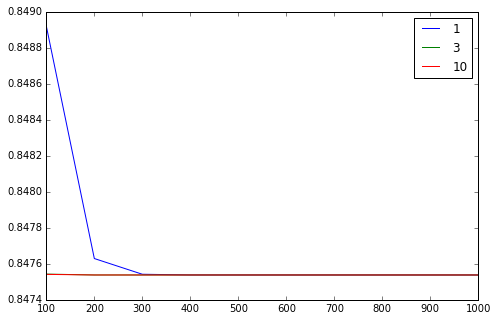

In [89]:
depths = [1,3,10]
nest = list(range(100,1001,100)) 
#не понимаю значения графика результатов по моделям с такими значениями n_estimators
#график про nest = list(range(10, 151, 10)) выглядит более осмысленным

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

for d in depths:
    dscores = []
    for n in nest:
        score = r2_score(y_test, GradientBoostingRegressor(max_depth=d,n_estimators=n).fit(X_train,y_train).predict(X_test))
        dscores.append(score)
        res = 'max_depth %d, n_estimators %d\tR2 score: %f'
        print(res % (d, n, score))
    ax.plot(nest,dscores,label = str(d))

plt.legend(loc = 1)

#### Используя все в библиотеке sklearn доступные регрессоры найдите самый лучший. (2.5)

In [88]:
models = {'SGDRegressor': SGDRegressor(), \
          'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=1000), \
          'RandomForestRegressor': RandomForestRegressor(n_estimators=100), \
          'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=10), \
          'MLPRegressor': MLPRegressor(), \
          'SVR': SVR(C=10)}
res = {}
for model in models:
    r = models[model].fit(X_train,y_train).score(X_test,y_test)
    res[r] = model
    print(model+': '+str(r))

print('max: '+res[max(res.keys())]+' - '+str(max(res.keys())))
#лучшие - MLPRegressor и SGDRegressor, 85%

SGDRegressor: 0.853395622191
RandomForestRegressor: 0.847122163881
MLPRegressor: 0.851390089208
SVR: 0.847519800923
GradientBoostingRegressor: 0.847537900801
KNeighborsRegressor: 0.80439410776
max: SGDRegressor - 0.853395622191


### Замечания

- В работе следует использовать библиотеку scikit-learn версии 0.18 и scipy версии 0.18.1
- Используйте данный Ipython Notebook при оформлении домашнего задания.